# Image Filtering Module

**Notes from Hany Farid's Computer Vision Course (UC Berkley)**
https://farid.berkeley.edu/downloads/tutorials/learnComputerVision/

## Convolutions
We begin the lessons on convolutions with a discussion of discrete-time signals and systems as well as an intro to linear time-invariant systems in 1-dimension. 

Two keys to the magic of Linear Time-Invariant systems are:

### 1. Linear property - you can just scale the output instead of the input

The fact that these systems are linear in nature means that it is functionally the same thing to pass our system a scaled value as it is to pass a raw value into the system and then scale the output. 

For example, our Linear Time-Invariant System (LTI) can be written as:

$ g[x] = T\{f[x]\}$

or

$ g[x] = T \bigg\{ 
\sum\limits_{k=-\infty}^\infty f[k]\delta[x-k]
\bigg\} $

So we can see the linear properly at play when, instead of scaling the delta (signal) by $f[k]$ inside the LTI system $T$, we can pull out that scale term and pass only the signal value itself into $T$ and scale the output of our system by $f[k]$.

$ g[x] = 
\sum\limits_{k=-\infty}^\infty f[k]T\{\delta[x-k]\}
$

### 2. Time-invariant property - you can just shift the output instead fo shifting the input

This means that if we define the output of our LTI $T\{\delta[x]\}$ as $h[x]$ then we can just add a shifting term to h instead of passing a shifted value into $T$

$ h[x] = T\{\delta[x]\}$

$ g[x] = 
\sum\limits_{k=-\infty}^\infty f[k]h[x-k]\}
$



Because of the two properties above we can just manipulate the output from one discrete signal (scaling and shifting) instead of needing to pass new inputs into the LTI system and re-compute everything.

> "A single unit-impulse response fully characterizes the linear time-invariant system"

So the above is a convolution but we note it using $\star$ notation like:

$ g[x] = (f \star h)[x]$

or

$ g[x] = f[x] \star h[x] $

And because our LTI system is a linear system of equations, we can solve for this with matrix multiplication like:

$ \begin{pmatrix}
g[0] \\
g[1] \\
g[2] \\
\vdots \\
g[n-1] \\
g[n]
\end{pmatrix} = \begin{pmatrix}
h_0 & h_{-1} & 0 & \dots & 0 & 0 & h_1 \\
h_1 & h_0 & h_{-1} & \dots & 0 & 0 & 0 \\
0 & h_1 & h_0 & \dots & 0 & 0 & 0 \\
\vdots &&& \ddots &&& \vdots \\
0 & 0 & 0 & \dots & h_1 & h_0 & h_{-1} \\
h_{-1} & 0 & 0 & \dots & 0 & h_1 & h_0 
\end{pmatrix}  \begin{pmatrix}
f[0] \\
f[1] \\
f[2] \\
\vdots \\
f[n-1] \\
f[n]
\end{pmatrix}$

or, as:

$ \vec{g} = M \vec{f} $

You'll also note that the second matrix there, $M$, is invertable - so we can also find the input values $f$ from the resulting matrix when we know $M$:

$ \vec{f} = M^{-1} \vec{g} $

*Note: We'll deal with edges of the convolution later on - for now you can see that we're wrapping the `h_x` values in the first and last row*


### 2-D Convolutions 

Moving from 1D to 2D is pretty straightforward - we can take the equations above and, instead of just having to deal with $x$, we will expect $[x,y]$ coordinate pairs instead.

Now instead of having a series of linear points moving down a line, we will have a little matrix (kernel) moving across the face of a larger matrix (pixel values) where the center of the kernel is the single impulse signal

So we can think about a **discrete image** as:

$f[x,y] = 
\sum\limits_{j=1}^m 
\sum\limits_{k=1}^n 
f[j,k]
\delta[x-j, y-k]
$

and the corresponding **convolution** using a LTI system as:

$g[x,y] = 
\sum\limits_{j=1}^m 
\sum\limits_{k=1}^n 
f[j,k]
h[x-j, y-k]
$

where the convolutional output is some shifted and scaled version of a **single unit-impulse response**, as:

$ h[x,y] = T\{\delta[x,y]\} $

### Edge Detection

A powerful use of convolutions is in edge detection, where you can find the vertical and horizontal derivative then combine them to find the "edges" of an image - where there is significant differences in neighboring pixel values

To find the vertical derivative we can use the following matrix as our filter (or, unit-impulse response) and see how it would magnify differences above and below the primary unit signal (center cell):

**Vertical Derivative ($f_y$)**

|   |   |   |
|---|---|---|
|-0.125|-0.250|-0.125|
|0|0|0|
|0.125|0.250|0.125|

Similarly, the following filter will maginfy differences in front of and behind the primary center cell:

**Horizontal Derivative ($f_x$)**

|   |   |   |
|---|---|---|
|-0.125|0|-0.125|
|-0.250|0|-0.250|
|-0.125|0|-0.125|


**Gradient (edges)**

These two filters can be combined to show us the edges of an image (all the places were there is a major change in value from pixel to pixel).

$ \sqrt{f_x^2 + f_y^2} $


### Exercise #6 - Computing Gradients

> Write some code to compute the image gradient: $ \sqrt{f_x^2 + f_y^2} $

> See `scipy.ndimage.convolve`

We'll use the same Einstein image Hany uses in his example here: https://farid.berkeley.edu/learnComputerVision/lectures/cv-03-05-convolution2D.mp4

(-0.5, 224.5, 223.5, -0.5)

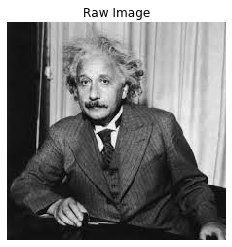

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy import ndimage

img_raw = 1.0 * plt.imread('../images/einstein.jpeg')

# It looks like my grey image includes 3 channels, although each of the values in each channel are identical... 
# I'll try to condense them down to a single channel
img = np.average(img_raw, axis=-1)
plt.imshow(img, cmap='gray')
plt.title('Raw Image')
plt.axis('off')

(-0.5, 224.5, 223.5, -0.5)

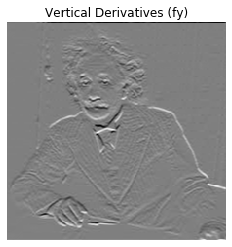

In [62]:
# compute vertical derivitaves and display image
v = np.array([[-0.125,-0.250,-0.125],[0,0,0],[0.125,0.250,0.125]])
vimg = ndimage.convolve(img, v, mode='constant')

plt.imshow(vimg, cmap='gray')
plt.title('Vertical Derivatives (fy)')
plt.axis('off')

(-0.5, 224.5, 223.5, -0.5)

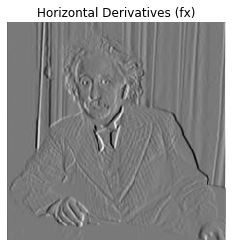

In [63]:
# compute and display horizontal derivatives
h = np.array([[-0.125,0,0.125],[-0.25,0,.25],[-0.125,0,0.125]])
himg = ndimage.convolve(img, h, mode='constant')

plt.imshow(himg, cmap='gray')
plt.title('Horizontal Derivatives (fx)')
plt.axis('off')

(-0.5, 224.5, 223.5, -0.5)

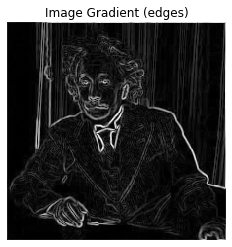

In [64]:
# square and sum the previous two values and display and image of the gradient
g = np.sqrt(vimg**2 + himg**2)

plt.imshow(g, cmap='gray')
plt.title('Image Gradient (edges)')
plt.axis('off')